In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Alur Kerja AI
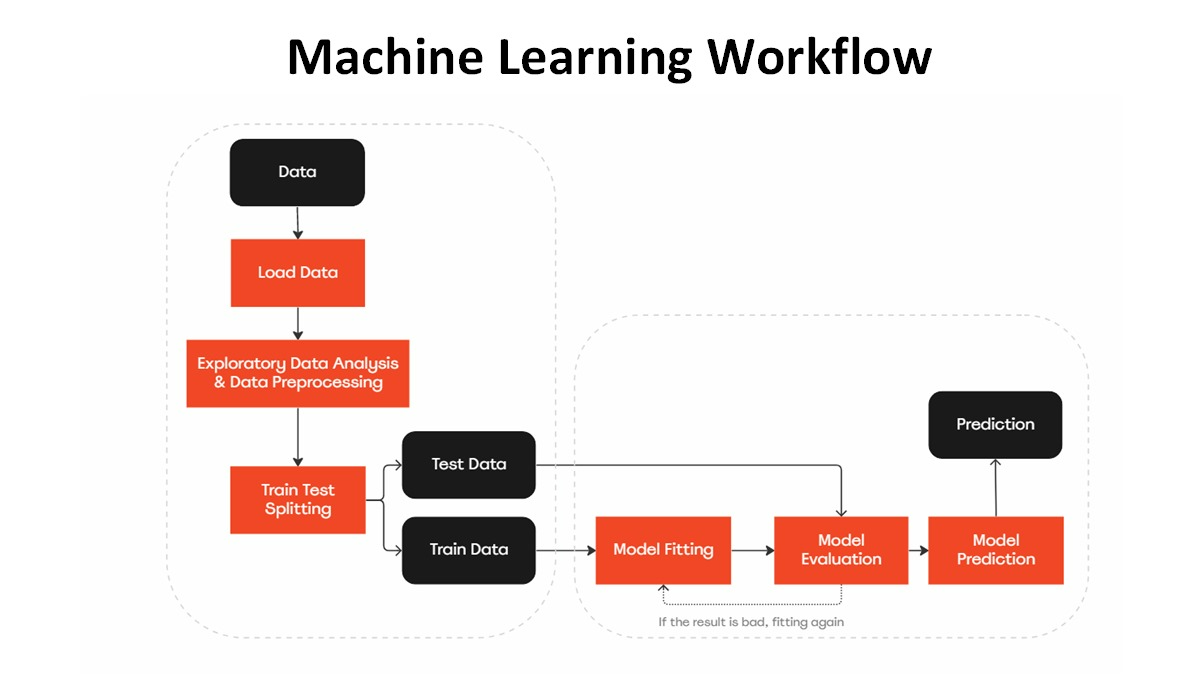

## Scikit pre processing
butuh label encoding untuk mengubah value dari beberrapa field menjadi angka

In [3]:
# load the data
file_path = '../Data/Raw/VRE_production_in_france_data_2020_2021.csv'
unfiltered_data = pd.read_csv(file_path)
# data = unfiltered_data[unfiltered_data['Source'] == 'Wind' ].copy()
data = unfiltered_data[unfiltered_data['Source'] == 'Solar' ].copy()

In [4]:
# print(data.head())
print(data.info())
# print(data[10:].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7184 entries, 0 to 14367
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           7184 non-null   object 
 1   Date and Hour       7184 non-null   object 
 2   Date                7184 non-null   object 
 3   StartHour           7184 non-null   object 
 4   EndHour             7184 non-null   object 
 5   Source              7184 non-null   object 
 6   Production          7184 non-null   int64  
 7   dayOfYear           7184 non-null   int64  
 8   dayName             7184 non-null   object 
 9   monthName           7184 non-null   object 
 10  GHI                 7184 non-null   int64  
 11  DNI                 7184 non-null   int64  
 12  Wind_Speed_2m       7184 non-null   float64
 13  Wind_Direction_2m   7184 non-null   int64  
 14  Temp_2m             7184 non-null   float64
 15  RH_2m               7184 non-null   float64
 16  Pressure  

In [5]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [6]:
# Split data into features and target
X = data.drop('Production', axis=1)  # Replace 'price' with your target column
y = data['Production']

In [7]:
# Scale features (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train the model
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [11]:
# Evaluate the model
y_pred_RF = model_RF.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_RF))
print("R² Score:", r2_score(y_test, y_pred_RF))

y_pred_LR = model_LR.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_LR))
print("R² Score:", r2_score(y_test, y_pred_LR))

Mean Absolute Error: 115.14887961029922
R² Score: 0.977177814274785
Mean Absolute Error: 397.3395655954389
R² Score: 0.8577857150364732


In [12]:
# Save predictions
output_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
output_RF.to_csv('../Data/Processed/Wind_processed_RandomForest.csv', index=False)

output_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})
output_LR.to_csv('../Data/Processed/Wind_processed_LinearRegression.csv', index=False)

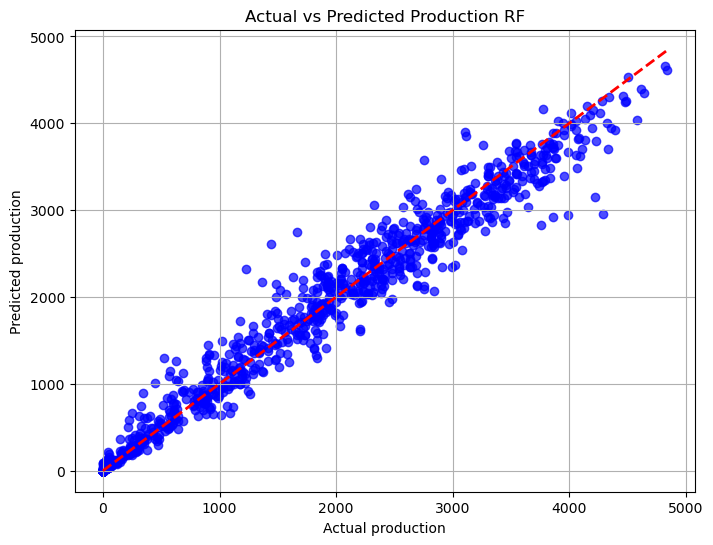

In [13]:
# visualisation
plt.figure(figsize=(8, 6))
plt.scatter(output_RF['Actual'], output_RF['Predicted'], alpha=0.7, color='blue')
plt.plot([output_RF['Actual'].min(), output_RF['Actual'].max()],
         [output_RF['Actual'].min(), output_RF['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Production RF')
plt.xlabel('Actual production')
plt.ylabel('Predicted production')
plt.grid(True)
plt.show()

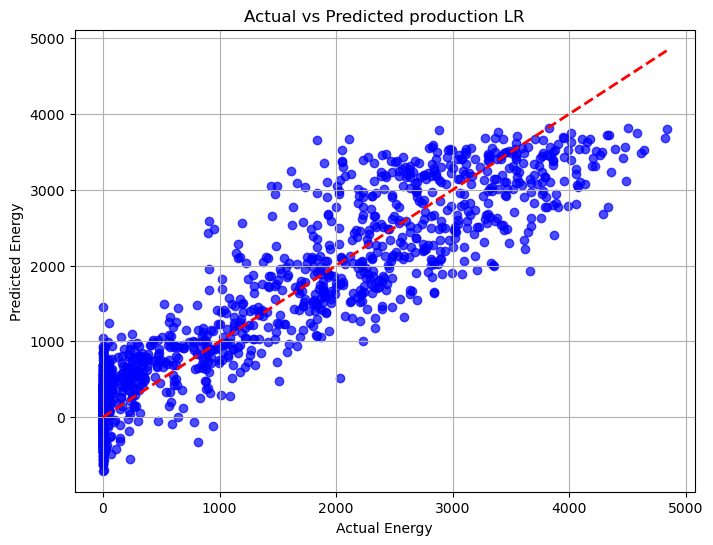

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(output_LR['Actual'], output_LR['Predicted'], alpha=0.7, color='blue')
plt.plot([output_LR['Actual'].min(), output_LR['Actual'].max()],
         [output_LR['Actual'].min(), output_LR['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted production LR')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.grid(True)
plt.show()